In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import seaborn as sns

In [6]:

customers = pd.read_csv('/content/Customers.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [7]:
transaction_summary = transactions.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    TransactionCount=('TransactionID', 'count')
).reset_index()

customerd = pd.merge(customers, transaction_summary, on='CustomerID', how='inner')

In [8]:

features = customerd[['TotalSpent', 'TransactionCount']]
scaler = StandardScaler()
scaledf = scaler.fit_transform(features)



# 4 clusters for sample


In [9]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
customerd['Cluster'] = kmeans.fit_predict(scaledf)


In [10]:

db_index = davies_bouldin_score(scaledf, customerd['Cluster'])
print(f"Davies-Bouldin Index (k={k}): {db_index:.4f}")

Davies-Bouldin Index (k=4): 0.8595


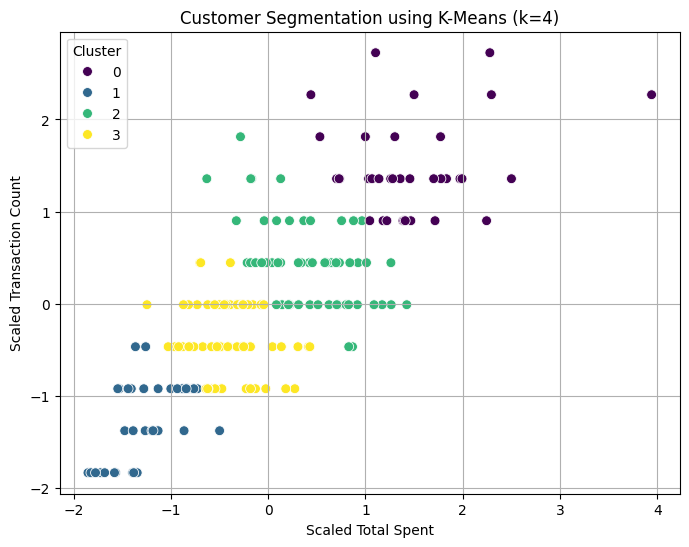

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaledf[:, 0], y=scaledf[:, 1], hue=customerd['Cluster'], palette='viridis', s=50
)
plt.title(f"Customer Segmentation using K-Means (k={k})")
plt.xlabel("Scaled Total Spent")
plt.ylabel("Scaled Transaction Count")
plt.legend(title="Cluster")
plt.grid()
plt.show()